# <font color='#4d9cfb'>IPL Data 🏏 (2008-2019)</font>

## Objective
Perform ‘Exploratory Data Analysis’ on the dataset of *Indian Premier League*. <br>
● As a sports analyst, find out the most successful teams, players and factors contributing to win or loss of a team. <br>
● Suggest teams or players a company should endorse for its products. <br>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Loading Deliveries Dataset

In [88]:
deliveries = pd.read_csv('deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


### Data Exploration

In [89]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [90]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [91]:
deliveries.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,179078.0,1802.252957,3472.322805,1.0,190.0,379.0,567.0,11415.0
inning,179078.0,1.482952,0.502074,1.0,1.0,1.0,2.0,5.0
over,179078.0,10.162488,5.677684,1.0,5.0,10.0,15.0,20.0
ball,179078.0,3.615587,1.806966,1.0,2.0,4.0,5.0,9.0
is_super_over,179078.0,0.000452,0.021263,0.0,0.0,0.0,0.0,1.0
wide_runs,179078.0,0.036721,0.251161,0.0,0.0,0.0,0.0,5.0
bye_runs,179078.0,0.004936,0.116480,0.0,0.0,0.0,0.0,4.0
legbye_runs,179078.0,0.021136,0.194908,0.0,0.0,0.0,0.0,5.0
noball_runs,179078.0,0.004183,0.070492,0.0,0.0,0.0,0.0,5.0
penalty_runs,179078.0,0.000056,0.016709,0.0,0.0,0.0,0.0,5.0


## Loading Matches Dataset

In [92]:
matches = pd.read_csv(r'.\matches.csv', parse_dates=['date'])
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [93]:
# Total Number of Teams
print(f"Total Number of Teams: {len(np.sort(matches.team1.unique()))}")

Total Number of Teams: 15


In [94]:
# Seasons (Years)
print("Seasons:", np.sort(matches.season.unique()))

Seasons: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [95]:
# Team Names
print("Teams:", np.sort(matches.team1.unique()))

Teams: ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


In [96]:
# Result of match and their value count
matches.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [97]:
matches.dl_applied.value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

> This means that 19 matches have been interupted.
In cricket, DL stands for "Duckworth-Lewis" method. It is a mathematical formula used to calculate the revised target for a team in a limited-overs match that has been interrupted due to weather or other reasons.

### Imputing Missing Values

In [98]:
matches[pd.isnull(matches.city)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [99]:
# Imputing the missing values of 'city'. Missing values of City is Dubai, as seen from 'venue' column.
matches.loc[pd.isnull(matches.city), 'city'] = 'Dubai'

## Data Pre-Processing

In [100]:
deliveries[deliveries.batsman_runs > 6]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151652,7898,2,Chennai Super Kings,Kolkata Knight Riders,20,1,DJ Bravo,RA Jadeja,R Vinay Kumar,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
157658,7924,1,Royal Challengers Bangalore,Mumbai Indians,10,2,BB McCullum,V Kohli,HH Pandya,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
157723,7924,1,Royal Challengers Bangalore,Mumbai Indians,20,6,C de Grandhomme,UT Yadav,MJ McClenaghan,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
168302,11151,1,Mumbai Indians,Chennai Super Kings,20,4,KA Pollard,HH Pandya,DJ Bravo,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
168845,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,2,CA Lynn,RV Uthappa,Mohammed Siraj,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
168903,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,18,4,AD Russell,S Gill,Mohammed Siraj,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
170577,11315,2,Mumbai Indians,Kings XI Punjab,20,1,KA Pollard,A Joseph,AS Rajpoot,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
172793,11325,1,Mumbai Indians,Delhi Capitals,6,6,RG Sharma,Q de Kock,K Paul,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
174198,11330,2,Chennai Super Kings,Royal Challengers Bangalore,19,3,MS Dhoni,DJ Bravo,N Saini,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN
176579,11341,1,Chennai Super Kings,Delhi Capitals,19,6,MS Dhoni,AT Rayudu,CH Morris,0,0,0,0,1,0,7,1,8,NaN,NaN,NaN


> This is suspisious, the 'noball_runs' is recorded both in 'batsman_runs' & 'extra_runs', inflating the 'total_runs'.

In [101]:
deliveries[deliveries.total_runs>=10]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150968,7896,1,Royal Challengers Bangalore,Kolkata Knight Riders,5,1,BB McCullum,V Kohli,Kuldeep Yadav,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
153511,7907,1,Mumbai Indians,Royal Challengers Bangalore,4,5,E Lewis,RG Sharma,Washington Sundar,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
153518,7907,1,Mumbai Indians,Royal Challengers Bangalore,5,5,E Lewis,RG Sharma,Mohammed Siraj,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
155660,7916,1,Sunrisers Hyderabad,Mumbai Indians,2,2,S Dhawan,KS Williamson,MJ McClenaghan,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
157768,7924,2,Mumbai Indians,Royal Challengers Bangalore,7,4,JP Duminy,KA Pollard,YS Chahal,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
157812,7924,2,Mumbai Indians,Royal Challengers Bangalore,14,2,HH Pandya,KH Pandya,C de Grandhomme,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
158215,7926,2,Kolkata Knight Riders,Chennai Super Kings,9,4,R Singh,S Gill,RA Jadeja,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
161560,7940,2,Rajasthan Royals,Mumbai Indians,1,2,D Short,JC Buttler,JJ Bumrah,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
167734,11149,1,Kings XI Punjab,Delhi Capitals,8,4,DA Miller,SN Khan,HV Patel,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN
168799,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,1,6,CA Lynn,SP Narine,TG Southee,0,5,0,0,0,0,5,5,10,NaN,NaN,NaN


> This is suspisious, the 'wide_runs' is recorded both in 'batsman_runs' & 'extra_runs', inflating the 'total_runs'

**SOLUTION: Replacing batsman_runs > 6 with 6**

In [102]:
deliveries.loc[(deliveries.batsman_runs > 6), 'batsman_runs'] = 6

In [103]:
# Type of runs:
run_features = ['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']
deliveries[run_features].head()

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,4,0,4
3,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,2,2


> - Type of runs: wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs
> - 'extra_runs' is the sum of all above type runs, except 'batsman_runs'
> - 'total_runs' = 'batsman_runs' + 'extra_runs'

## Merging Both Tables

In [104]:
deliveries_matches = deliveries.merge(matches[['id', 'season', 'city', 'winner']], \
                                      how='left', left_on='match_id', right_on='id')
deliveries_matches.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,Sunrisers Hyderabad


## Data Preparation

In [105]:
# Total runs and total balls played by each batsman.
runs_deliveries = deliveries.groupby('batsman') \
                            .aggregate({'total_runs': 'sum', 'ball': 'count'}) \
                            .sort_values(by='total_runs',ascending=False)

runs_deliveries.columns = ['total_runs', 'deliveries']

# Run rate of each batsman.
runs_deliveries['run_rate'] = runs_deliveries.total_runs / (runs_deliveries.deliveries / 6)

runs_deliveries.head()

,total_runs,deliveries,run_rate
batsman,,,
SK Raina,5651,4044,8.384273
V Kohli,5616,4211,8.001900
RG Sharma,5057,3816,7.951258
DA Warner,4975,3398,8.784579
S Dhawan,4876,3776,7.747881


In [141]:
# Total runs conceded and number of deliveries made by each bowler.
runs_deliveries_bowler = deliveries.groupby('bowler') \
                                   .aggregate({'total_runs': 'sum', 'ball': 'count'}) \
                                   .sort_values(by='total_runs',ascending=False)

runs_deliveries_bowler.columns = ['total_runs_conceded', 'deliveries']

# Conceded ratio of each bowler.
runs_deliveries_bowler['conceded_ratio'] = runs_deliveries_bowler.total_runs_conceded / \
                                          (runs_deliveries_bowler.deliveries / 6)

runs_deliveries_bowler.head()

,total_runs_conceded,deliveries,conceded_ratio
bowler,,,
PP Chawla,4153,3157,7.892936
Harbhajan Singh,4050,3451,7.041437
A Mishra,3850,3172,7.282472
DJ Bravo,3733,2711,8.261896
UT Yadav,3640,2605,8.383877


In [107]:
# Extra runs conceded and number of deliveries made by each bowler.
extraruns_deliveries_bowler = deliveries.groupby('bowler') \
                                        .aggregate({'extra_runs': 'sum', 'ball': 'count'}) \
                                        .sort_values(by='extra_runs',ascending=False)

extraruns_deliveries_bowler.columns = ['extra_runs_conceded', 'deliveries']

# Conceded ratio of each bowler.
extraruns_deliveries_bowler['conceded_ratio'] = extraruns_deliveries_bowler.extra_runs_conceded / \
                                               (extraruns_deliveries_bowler.deliveries / 6)

extraruns_deliveries_bowler.head()

,extra_runs_conceded,deliveries,conceded_ratio
bowler,,,
SL Malinga,293,2974,0.591123
P Kumar,236,2637,0.536974
UT Yadav,219,2605,0.504415
DJ Bravo,201,2711,0.444854
B Kumar,197,2707,0.436646


In [108]:
# Total dismissed and number of deliveries by each bowler
outs_deliveries = deliveries.groupby('bowler') \
                            .aggregate({'dismissal_kind': 'count', 'ball': 'count'}) \
                            .sort_values(by='dismissal_kind', ascending=False)

outs_deliveries.columns = ['total_wickets', 'deliveries']

outs_deliveries['dimissal_ratio'] = outs_deliveries.total_wickets / (outs_deliveries.deliveries / 6)
outs_deliveries.head()

,total_wickets,deliveries,dimissal_ratio
bowler,,,
SL Malinga,188,2974,0.379287
DJ Bravo,168,2711,0.371819
A Mishra,165,3172,0.312106
Harbhajan Singh,161,3451,0.279919
PP Chawla,156,3157,0.296484


In [109]:
# Total deliveries played and number of times dismissed.
deliveries.groupby('batsman') \
          .aggregate({'dismissal_kind': 'count', 'ball': 'count'}) \
          .sort_values(by='ball', ascending=False)

,dismissal_kind,ball
batsman,,
V Kohli,152,4211
SK Raina,161,4044
RG Sharma,162,3816
S Dhawan,137,3776
G Gambhir,135,3524
...,...,...
P Raj,0,1
Sunny Gupta,1,1
LH Ferguson,0,1


In [110]:
# Total runs and deliveries played by each batsman in each match.
deliveries.groupby(['match_id', 'batsman']) \
          .aggregate({'total_runs': 'sum', 'ball': 'count'}) \
          .sort_values(by='match_id')

total_runs  ball
match_id batsman                       
1        A Choudhary            6     2
         Yuvraj Singh          65    30
         YS Chahal              3     7
         TS Mills               7     3
         TM Head               30    22
...                           ...   ...
11415    AT Rayudu              1     4
         AS Yadav              15    18
         SN Thakur              2     2
         KH Pandya              7     7
         SR Watson             88    62

[11294 rows x 2 columns]

In [111]:
# Number of matches played and average run scored by each batsman.
matches_runs = deliveries.groupby(['batsman', 'match_id']) \
                         .aggregate({'match_id': 'count', 'total_runs': 'sum'}) \
                         .groupby(['batsman']).aggregate({'match_id': 'count', 'total_runs': 'mean'}) \
                         .sort_values(by='match_id', ascending=False)

matches_runs.columns = ['Total_macthes', 'Average_runs']

matches_runs

,Total_macthes,Average_runs
batsman,,
SK Raina,189,29.899471
RG Sharma,182,27.785714
RV Uthappa,170,27.664706
MS Dhoni,170,27.594118
V Kohli,169,33.230769
...,...,...
Mustafizur Rahman,1,1.000000
N Naik,1,9.000000
ND Doshi,1,0.000000


In [112]:
""" Showing the no. of runs each batsman has made for a particular run type.
    Note: Result might be different from 'runs_deliveries' (cell 19)
          becuase here 'batsman_runs' is used, instead of 'total_runs' (which includes 'extra_runs').  
"""
batsman_run_type = deliveries.groupby(['batsman', 'batsman_runs']).aggregate({'batsman_runs': 'sum'})
batsman_run_type.columns = ['runs']
batsman_run_type.reset_index(inplace=True)
batsman_run_type.rename(columns={'batsman_runs': 'Run_type'}, inplace=True)

# Adding total number of runs (mainly for sorting).
batsman_run_mask = batsman_run_type.groupby('batsman')['runs'].sum()
batsman_run_type['total_runs'] = batsman_run_type.batsman.map(batsman_run_mask)
batsman_run_type.sort_values('total_runs', ascending=False, inplace=True)
batsman_run_type.head(10)

,batsman,Run_type,runs,total_runs
2255,V Kohli,6,1146,5434
2251,V Kohli,1,1741,5434
2254,V Kohli,4,1928,5434
2253,V Kohli,3,33,5434
2252,V Kohli,2,586,5434
2250,V Kohli,0,0,5434
1984,SK Raina,4,1980,5415
1983,SK Raina,3,33,5415
1985,SK Raina,5,5,5415
1986,SK Raina,6,1170,5415


In [113]:
# Type of dismissal by each bowler and its count.
bowler_dissimal_kind = deliveries.groupby(['bowler', 'dismissal_kind']).aggregate({'dismissal_kind': 'count'})
bowler_dissimal_kind.columns = ['num_disimissal']
bowler_dissimal_kind.reset_index(inplace=True)

# Adding total number of dismissal in descending order (mainly for sorting).
bowler_dis_mask = bowler_dissimal_kind.groupby('bowler')['num_disimissal'].sum()
bowler_dissimal_kind['total_dismissal'] = bowler_dissimal_kind.bowler.map(bowler_dis_mask)
bowler_dissimal_kind.sort_values('total_dismissal', ascending=False, inplace=True)
bowler_dissimal_kind.head()

,bowler,dismissal_kind,num_disimissal,total_dismissal
986,SL Malinga,bowled,63,188
987,SL Malinga,caught,91,188
988,SL Malinga,caught and bowled,5,188
989,SL Malinga,lbw,11,188
990,SL Malinga,run out,18,188


In [114]:
""" Calculating the runs scored by each batsman in each match, 
        broken down by the type of run (1, 2, 3, 4, or 6)."""

# The code groups the deliveries dataset by three columns, and calculates the sum of the 'batsman_runs' column for each combination.
# The resulting DataFrame has four columns: batsman, match_id, batsman_run_type, and runs.
batsman_run_type_match = deliveries.groupby(['batsman', 'match_id', 'batsman_runs']).aggregate({'batsman_runs': 'sum'})
batsman_run_type_match.columns = ['runs']
batsman_run_type_match.reset_index(inplace=True)
batsman_run_type_match.rename(columns={'batsman_runs': 'batsman_run_type'}, inplace=True)

# Adding total runs scored by a batsman in a particular match.
batsman_run_type_match_mask = batsman_run_type_match.groupby(['batsman', 'match_id'])['runs'].sum().reset_index()
batsman_run_type_match = batsman_run_type_match.merge(batsman_run_type_match_mask, on=['batsman', 'match_id'], how='left')
batsman_run_type_match.rename(columns={'runs_x': 'runs', 'runs_y': 'total_runs_match_id'}, inplace=True)
# batsman_run_type_match.sort_values('total_runs_match_id', ascending=False, inplace=True)

# Adding total runs scored by the batsman across all matches (mainly for sorting).
batsman_run_type_match_mask = batsman_run_type_match.groupby('batsman')['runs'].sum()
batsman_run_type_match['total_runs'] = batsman_run_type_match.batsman.map(batsman_run_type_match_mask)
batsman_run_type_match.sort_values(['total_runs', 'match_id'], ascending=[False, True], inplace=True)

# Drop batsman_run_type == 0
batsman_run_type_match.drop(batsman_run_type_match[batsman_run_type_match['batsman_run_type'] == 0].index, inplace=True)

# Reset index
batsman_run_type_match.reset_index(drop=True, inplace=True)

batsman_run_type_match.head()

,batsman,match_id,batsman_run_type,runs,total_runs_match_id,total_runs
0,V Kohli,12,1,22,62,5434
1,V Kohli,12,2,8,62,5434
2,V Kohli,12,4,20,62,5434
3,V Kohli,12,6,12,62,5434
4,V Kohli,17,1,5,28,5434


In [115]:
""" Top Fielders """
# Groupping the dataset by two columns, and counting the number of occurrences of each combination using the aggregate function.
count_out = deliveries.groupby(['fielder', 'dismissal_kind']).aggregate({'fielder': 'count'})
# Modified to have a single column named dismissals.
count_out.columns = ['dismissals']
count_out.reset_index(inplace=True)

# Sorting the DF by total number of dismissals per fielder for retrieving top fielders.
count_out_mask = deliveries.fielder.value_counts()
count_out['Total_dismissals'] = count_out.fielder.map(count_out_mask)
count_out.sort_values(['Total_dismissals', 'fielder'], ascending=[False, True], inplace=True)
count_out.head(10)

,fielder,dismissal_kind,dismissals,Total_dismissals
443,MS Dhoni,caught,98,159
444,MS Dhoni,run out,23,159
445,MS Dhoni,stumped,38,159
321,KD Karthik,caught,109,152
322,KD Karthik,run out,14,152
323,KD Karthik,stumped,29,152
587,RV Uthappa,caught,84,125
588,RV Uthappa,run out,9,125
589,RV Uthappa,stumped,32,125
648,SK Raina,caught,99,115


# Data Analysis

### 1. Total Matches and Average Runs of Top 10 Batsman

This code creates a bar plot of the total number of matches played by the top 10 batsmen, along with a scatter plot of each batsman's average runs scored per match. The data used in this plot is stored in the temp DataFrame, which is created by taking the first 10 rows of another DataFrame called matches_runs [cell no. 25].

In [116]:
temp = matches_runs.reset_index().head(10).copy()
temp

,batsman,Total_macthes,Average_runs
0,SK Raina,189,29.899471
1,RG Sharma,182,27.785714
2,RV Uthappa,170,27.664706
3,MS Dhoni,170,27.594118
4,V Kohli,169,33.230769
5,KD Karthik,162,23.790123
6,S Dhawan,158,30.860759
7,YK Pathan,153,22.248366
8,G Gambhir,151,29.701987
9,AB de Villiers,142,32.274648


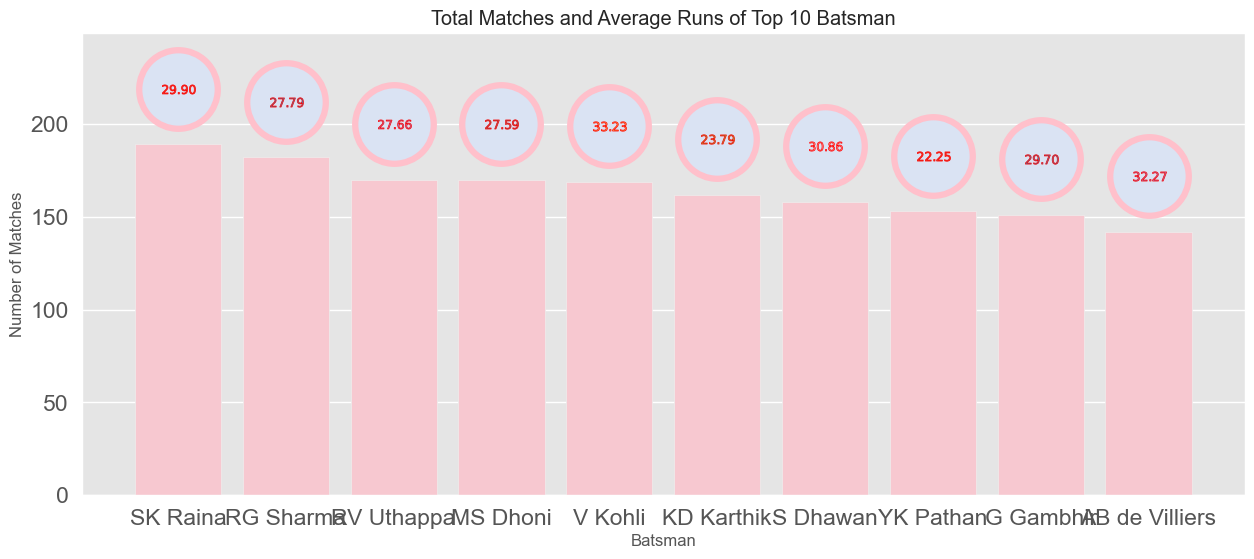

In [117]:
plt.figure(figsize=(15,6))

# Bar Plot
p1 = sns.barplot(data=temp, x='batsman', y='Total_macthes', color='pink')

# Retrieves the height of the first bar in the barplot.
# It is used to set the upper limit of the y-axis in the plot, to ensure that the circle markers for the average runs label do not overlap with the bars. 
bar_height = p1.patches[0].get_height()

# Adding a circle on top of the bar.
# Each point on the scatter plot represents a batsman's total number of matches played, with a circle marker colored in light blue (#dae3f3).
circle_apart = 30
temp['Total_macthes'] = temp['Total_macthes'] + circle_apart
sns.scatterplot(data=temp, \
            x='batsman', \
            y='Total_macthes', \
            color='#dae3f3', marker='o', s=3200, edgecolor='pink')

# Add Average Runs Label
# Creates a scatter plot point at the (x,y) coordinates of the batsman's name and the number of matches they played, respectively.
for i, c in enumerate(temp[['batsman', 'Total_macthes']].values):
    val = np.round(temp['Average_runs'][i], 2)
    plt.scatter(c[0], c[1], marker='$%.2f$' % val, alpha=1, s=600, edgecolor='red')

# set plot title and axis labels
plt.title('Total Matches and Average Runs of Top 10 Batsman')
plt.xlabel('Batsman')
plt.ylabel('Number of Matches')
plt.ylim(0, bar_height + (circle_apart * 2))

# show plot
plt.show()

> Inferences:
> - 'SK Raina' played the highest number of matches with an average of 29.9 runs. 
> - 'V Kohli' achieved the highest average runs of 33.23.

### 2. Top 10 Batsman by Runs & Top 10 Bowler by Wickets

This code is creating a bar chart showing the top 10 batsmen by runs and the top 10 bowlers by wickets in the IPL matches dataset. It is using matplotlib to create a figure with two subplots arranged side by side (specified by `1,2` in the `plt.subplots()` call), each of size 15 inches wide by 5 inches tall (specified by `figsize=(15,5)`).  <br>

Data used: <br>
- runs_deliveries <br>
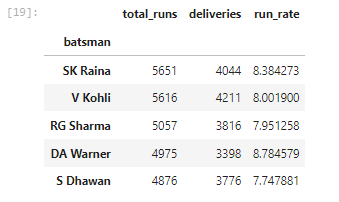 <br>
- outs_deliveries <br>
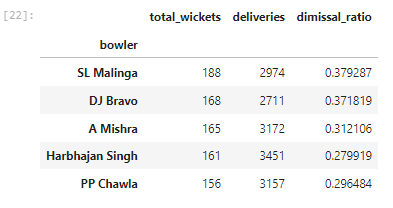

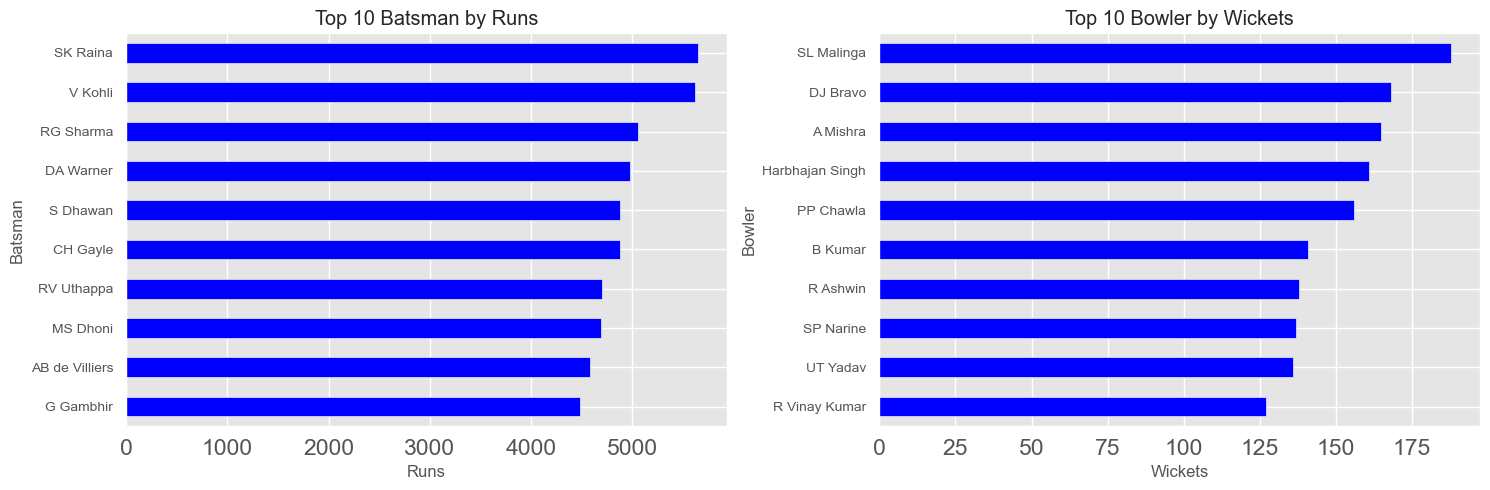

In [118]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

""" The top 10 batsmen by runs are extracted from the 'runs_deliveries' DF by selecting the 'total_runs' column, 
    taking the first 10 rows using .head(10), 
    and then sorting the values in ascending order. """
runs_deliveries['total_runs'].head(10) \
                             .sort_values() \
                             .plot(kind='barh', title='Top 10 Batsman by Runs', ax=axs[0], color='blue')
axs[0].set_xlabel('Runs')
axs[0].set_ylabel('Batsman')
# Setting the font size of the y-axis tick labels of the first subplot to 10.
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=10)


""" The top 10 bowlers by wickets are extracted from the 'outs_deliveries' DF by selecting the 'total_wickets' column, 
    taking the first 10 rows using .head(10), 
    and then sorting the values in ascending order. """
outs_deliveries['total_wickets'].head(10) \
                                .sort_values() \
                                .plot(kind='barh', title='Top 10 Bowler by Wickets', ax=axs[1], color='blue')
axs[1].set_xlabel('Wickets')
axs[1].set_ylabel('Bowler')
# Setting the font size of the y-axis tick labels of the second subplot to 10.
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=10)

# To adjust the spacing between the subplots.
plt.tight_layout()

plt.show()

### 3. Top 10 Batsman by Run Rate (#Runs/#Overs) & Top 10 Bowler by Dimissal Ratio (#Wickets/#Overs)

This code generates a horizontal bar plot for the top 10 batsmen and bowlers based on their performance ratios. The figure has two subplots arranged horizontally with a common y-axis. <br>

Data used: <br>
- runs_deliveries <br>
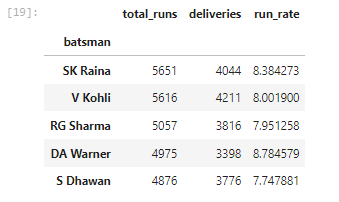 <br>
- outs_deliveries <br>
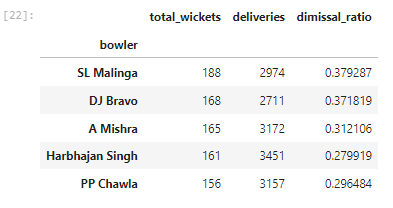

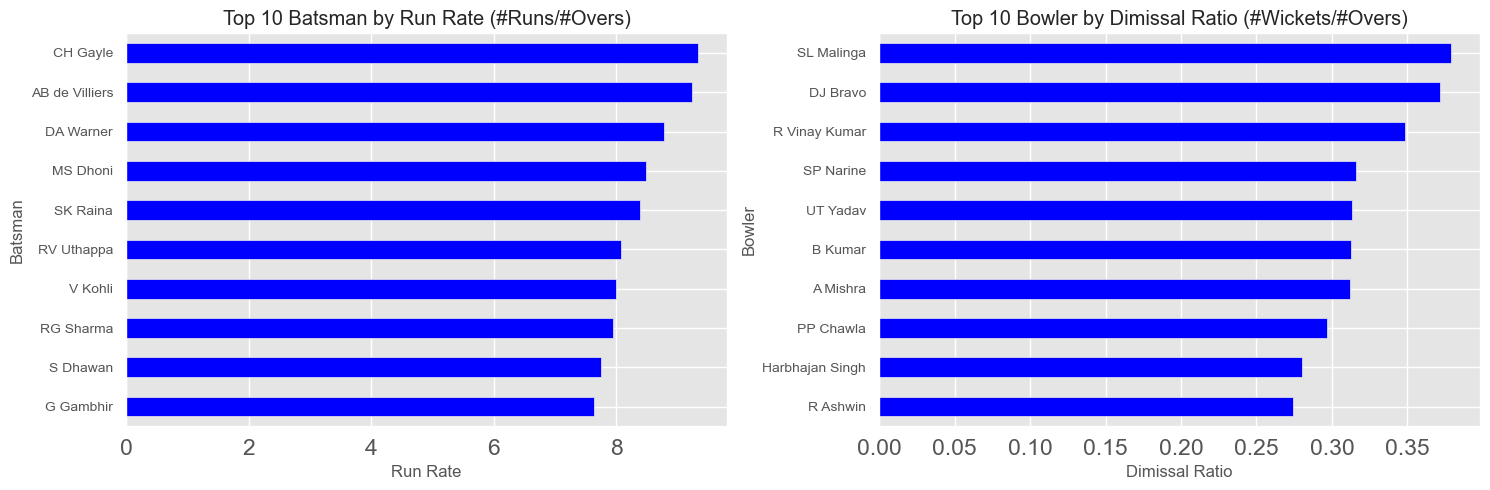

In [119]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

""" Selecting the top 10 batsmen based on their run rate, 
    and then sorting the values in ascending order. """
runs_deliveries['run_rate'].head(10) \
                           .sort_values() \
                           .plot(kind='barh', title='Top 10 Batsman by Run Rate (#Runs/#Overs)', ax=axs[0], color='blue')
axs[0].set_xlabel('Run Rate')
axs[0].set_ylabel('Batsman')
# Setting the font size of the y-axis tick labels of the first subplot to 10.
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=10)


""" Selecting the top 10 bowlers based on their dismissal ratio, 
    and then sorting the values in ascending order. """
outs_deliveries['dimissal_ratio'].head(10) \
                                 .sort_values() \
                                 .plot(kind='barh', title='Top 10 Bowler by Dimissal Ratio (#Wickets/#Overs)', ax=axs[1], color='blue')
axs[1].set_xlabel('Dimissal Ratio')
axs[1].set_ylabel('Bowler')
# Setting the font size of the y-axis tick labels of the second subplot to 10.
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=10)

# To adjust the spacing between the subplots.
plt.tight_layout()
plt.show()

**Note: The list shows the top performing players based on activity, rather than focusing on overall performance. This ensures that we focus on active bowlers who are at the top of their game, rather than misleading statistics such as high dismissal ratios for players who have bowled very few overs.** <br>
Ex: There could be a bowler who have bowled 1 over and got 2 wickets, then his Dismissal Ratio would be 200%, meaning high on the chart. But that's kind of misleading. We want to focus on active bowlers/top of the pyramid.

### 4. Top 10 Worst Bowlers by Total Runs Conceded & Top 10 Worst Bowlers by Extra Runs Conceded

This code generates two horizontal bar charts side by side showing the top 10 worst bowlers in terms of total runs and extra runs conceded in the IPL matches. <br>

Data used: <br>
- runs_deliveries_bowler <br>
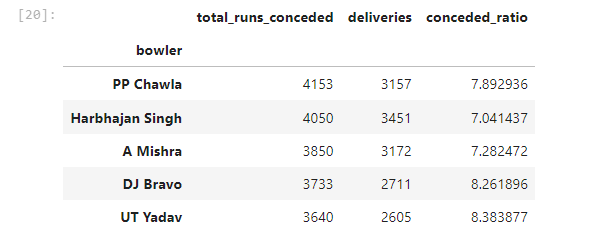 <br>
- extraruns_deliveries_bowler <br>
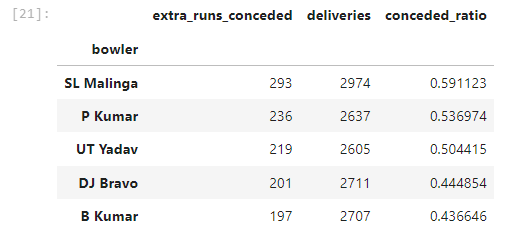

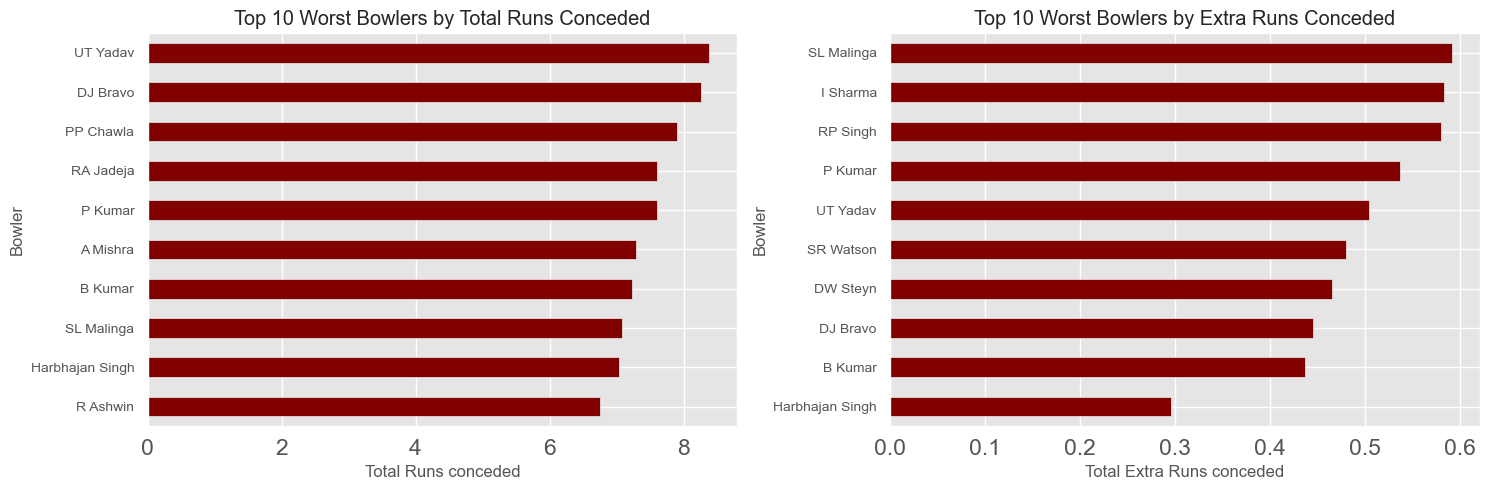

In [120]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

runs_deliveries_bowler['conceded_ratio'].head(10) \
                                        .sort_values() \
                                        .plot(kind='barh', title='Top 10 Worst Bowlers by Total Runs Conceded', ax=axs[0], color='maroon')
axs[0].set_xlabel('Total Runs conceded')
axs[0].set_ylabel('Bowler')
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=10)


extraruns_deliveries_bowler['conceded_ratio'].head(10) \
                                             .sort_values() \
                                             .plot(kind='barh', title='Top 10 Worst Bowlers by Extra Runs Conceded', ax=axs[1], color='maroon')
axs[1].set_xlabel('Total Extra Runs conceded')
axs[1].set_ylabel('Bowler')
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.show()

> Inferences:
> - 'UT Yadav' and 'DJ Bravo' have conceded the highest number of runs among active bowlers.
> - 'SL Malinga', being the bowler with the highest number of dismissals, has also incurred the highest number of extra runs.

### 5. Top 10 Batsmen by Total Runs

This code retrieves data for the top 10 batsmen based on their total runs scored, and then creates a stacked bar chart to visualize the breakdown of runs scored by each batsman for different types of runs (1s, 2s, 3s, 4s, 6s). <br>

Data used:
- batsman_run_type <br>
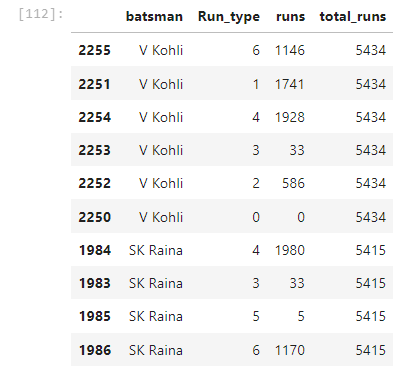

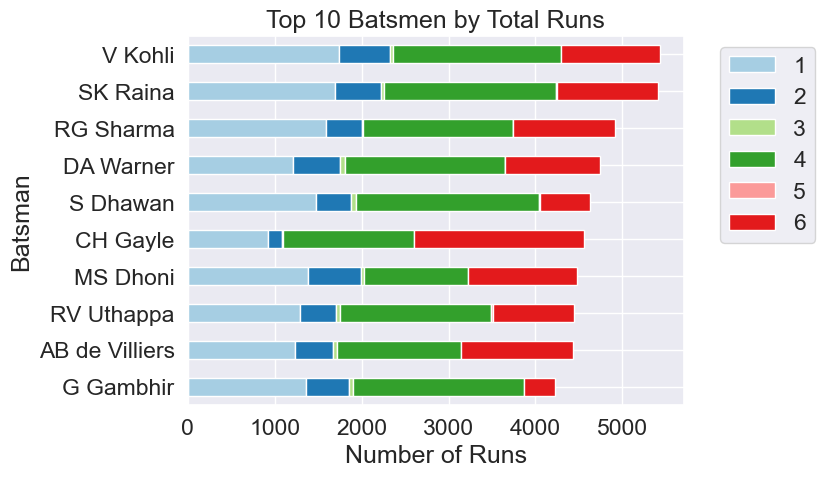

In [155]:
# Retrieve Top 10 Batsman.
top_10_players = batsman_run_type['batsman'].unique()[:10]
top_10_players_runs = batsman_run_type[batsman_run_type['batsman'].isin(top_10_players)]

# Pivot the data to create a stacked bar chart.
pivot_df = top_10_players_runs.pivot(index='batsman', columns='Run_type', values='runs')

# Sort by total no. of runs and remove the 'total_runs' and '0' columns.
pivot_df['total_runs'] = pivot_df.apply(lambda x: x.sum(), axis=1)
pivot_df.sort_values('total_runs', inplace=True)
pivot_df.drop(['total_runs', 0], axis=1, inplace=True)

# Import a colour pallete and assign colours to each type of run.
import matplotlib.cm as cm
cmap = cm.get_cmap('Paired')
colors = cmap(range(pivot_df.shape[1]))

# Create a horizontal stacked bar chart.
pivot_df.plot(kind='barh', stacked=True, color=colors)

# Add chart title and labels.
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Number of Runs')
plt.ylabel('Batsman')

# Adjust the legend.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the chart.
plt.show()

> Inferences:
> - The majority of a batsman's total score is attributed to runs scored through 1s & 4s.
> - Among all players, 'CH Gayle' has the highest contribution from 6s towards his overall runs.
> - 'MS Dhoni' has demonstrated consistent performance across all types of runs, including 1s, 4s, and 6s, throughout his career.

> Note: the plot might seem different from 'Top 10 Batsman by Runs', becuase here 'batsman_runs' is used instead of 'total_runs' which includes 'extra_runs'

### 6. Top 10 Dismissals by Bowler

This code retrieves data for the top 10 bowlers based on their total dismissals, and then creates a stacked bar chart to visualize the breakdown of the number of dismissals by different types of dismissals (bowled, caught, lbw, etc.). <br>

Data used:
- bowler_dissimal_kind <br>
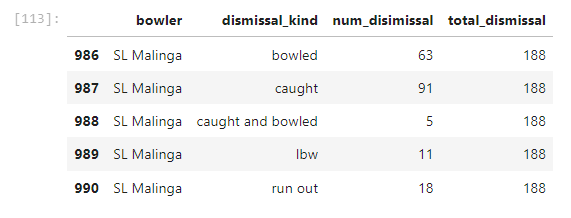

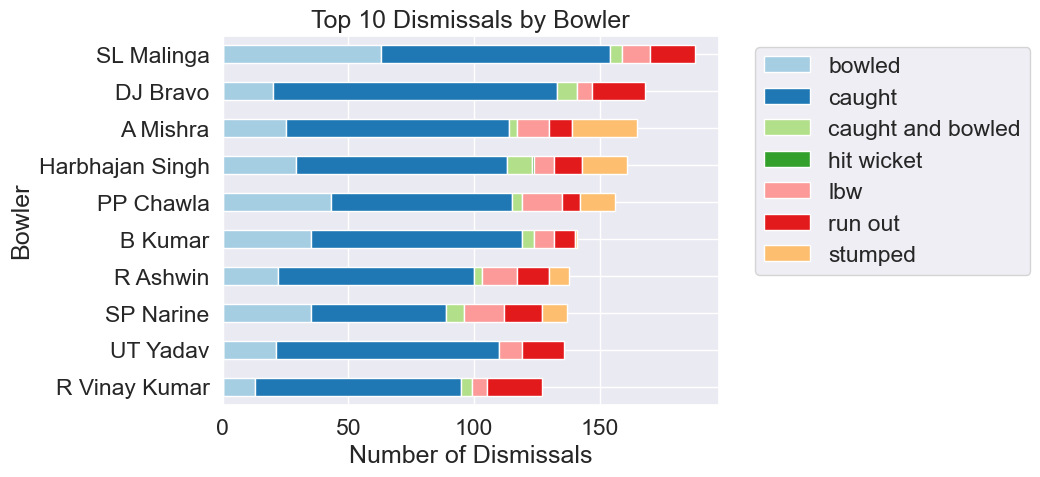

In [156]:
# Retrieve Top 10 Bowlers.
top_10_players = bowler_dissimal_kind['bowler'].unique()[:10]
top_10_players_runs = bowler_dissimal_kind[bowler_dissimal_kind['bowler'].isin(top_10_players)]

# Pivot the data to create a stacked bar chart.
pivot_df = top_10_players_runs.pivot(index='bowler', columns='dismissal_kind', values='num_disimissal')

# Sort by total no. of wickets (dismissals) and drop the 'total_dismissal' column.
pivot_df['total_dismissal'] = pivot_df.apply(lambda x: x.sum(), axis=1)
pivot_df.sort_values('total_dismissal', inplace=True)
pivot_df.drop('total_dismissal', axis=1, inplace=True)

# Import a color pallete and assign colours to each type of dismissal.
import matplotlib.cm as cm
cmap = cm.get_cmap('Paired')
colors = cmap(range(pivot_df.shape[1]))

# Create a horizontal stacked bar chart.
pivot_df.plot(kind='barh', stacked=True, color=colors)

# Add chart title and labels.
plt.title('Top 10 Dismissals by Bowler')
plt.xlabel('Number of Dismissals')
plt.ylabel('Bowler')

# Adjust the legend.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the chart.
plt.show()

> Inferences:
> - 'SL Malinga' has bowled most of players - being a fast bowler works well for Malinga (A Death Bolwer) :)
> - The majority of bowlers' total wickets come from catches, indicating the significance of this fielding technique in cricket.
> - The number of wickets obtained by 'run out' dismissals is relatively insignificant compared to other forms of dismissals.
> - 'SL Malinga' and 'DJ Bravo' has no wickets by stumpping.

### 7. Top 10 Dismissals by Fielders

This code retrieves data for the top 10 fielders based on their total dismissals, and then creates a stacked bar chart to visualize the breakdown of the number of dismissals by different types of dismissals (caught, run out, stumped). <br>

Data used:
- count_out <br>
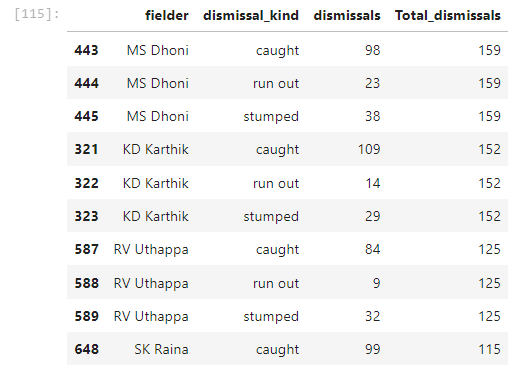

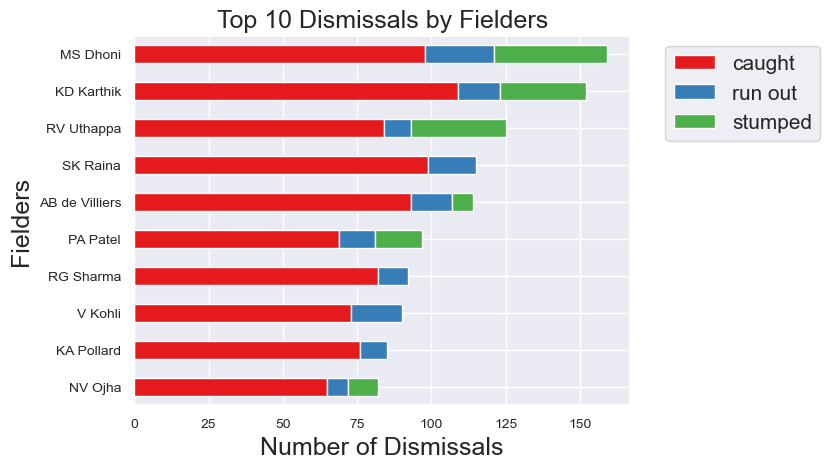

In [161]:
# Retrieve Top 10 Fielders.
top_10_players = count_out['fielder'].unique()[:10]
top_10_players_field = count_out[count_out['fielder'].isin(top_10_players)]

# Pivot the data to create a stacked bar chart.
pivot_df = top_10_players_field.pivot(index='fielder', columns='dismissal_kind', values='dismissals')

# Sort by total no. of dismissals and drop the 'total_dismissals' column.
pivot_df['total_dismissals'] = pivot_df.apply(lambda x: x.sum(), axis=1)
pivot_df.sort_values('total_dismissals', inplace=True)
pivot_df.drop(['total_dismissals'], axis=1, inplace=True)

# Import a color pallete and assign colours to each type of dismissal.
import matplotlib.cm as cm
cmap = cm.get_cmap('Set1')
colors = cmap(range(pivot_df.shape[1]))

# Create a horizontal stacked bar chart.
pivot_df.plot(kind='barh', stacked=True, color=colors)

# Add chart title and labels.
plt.title('Top 10 Dismissals by Fielders')
plt.xlabel('Number of Dismissals')
plt.ylabel('Fielders')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust the legend.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
# Show the chart.
plt.show()

> Inferences:
> - 'MS Dhoni' and 'KD Karthik' have a phenomenal track record for the most number of dismissals.
> - 'MS Dhoni', being the wicket-keeper and a phenomenal player, has the most number of 'stumped' dismissals. Followed by 'KD Karthik' and 'RV Uthappa'
> - 'SK Raina', 'RG Sharma', 'V Kohli', and 'KA Pollard' have dismissed most players by catching the ball.

### 8. Top 10 Player's Total Runs by Run Type for each Match

This code is plotting scatter plots to show the total runs scored by each player for different run types in each match. It retrieves the top 10 players based on the unique values in the `batsman` column of the `batsman_run_type_match` dataframe.

Data used:
- batsman_run_type_match <br>
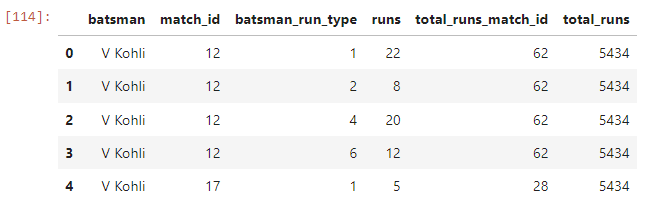

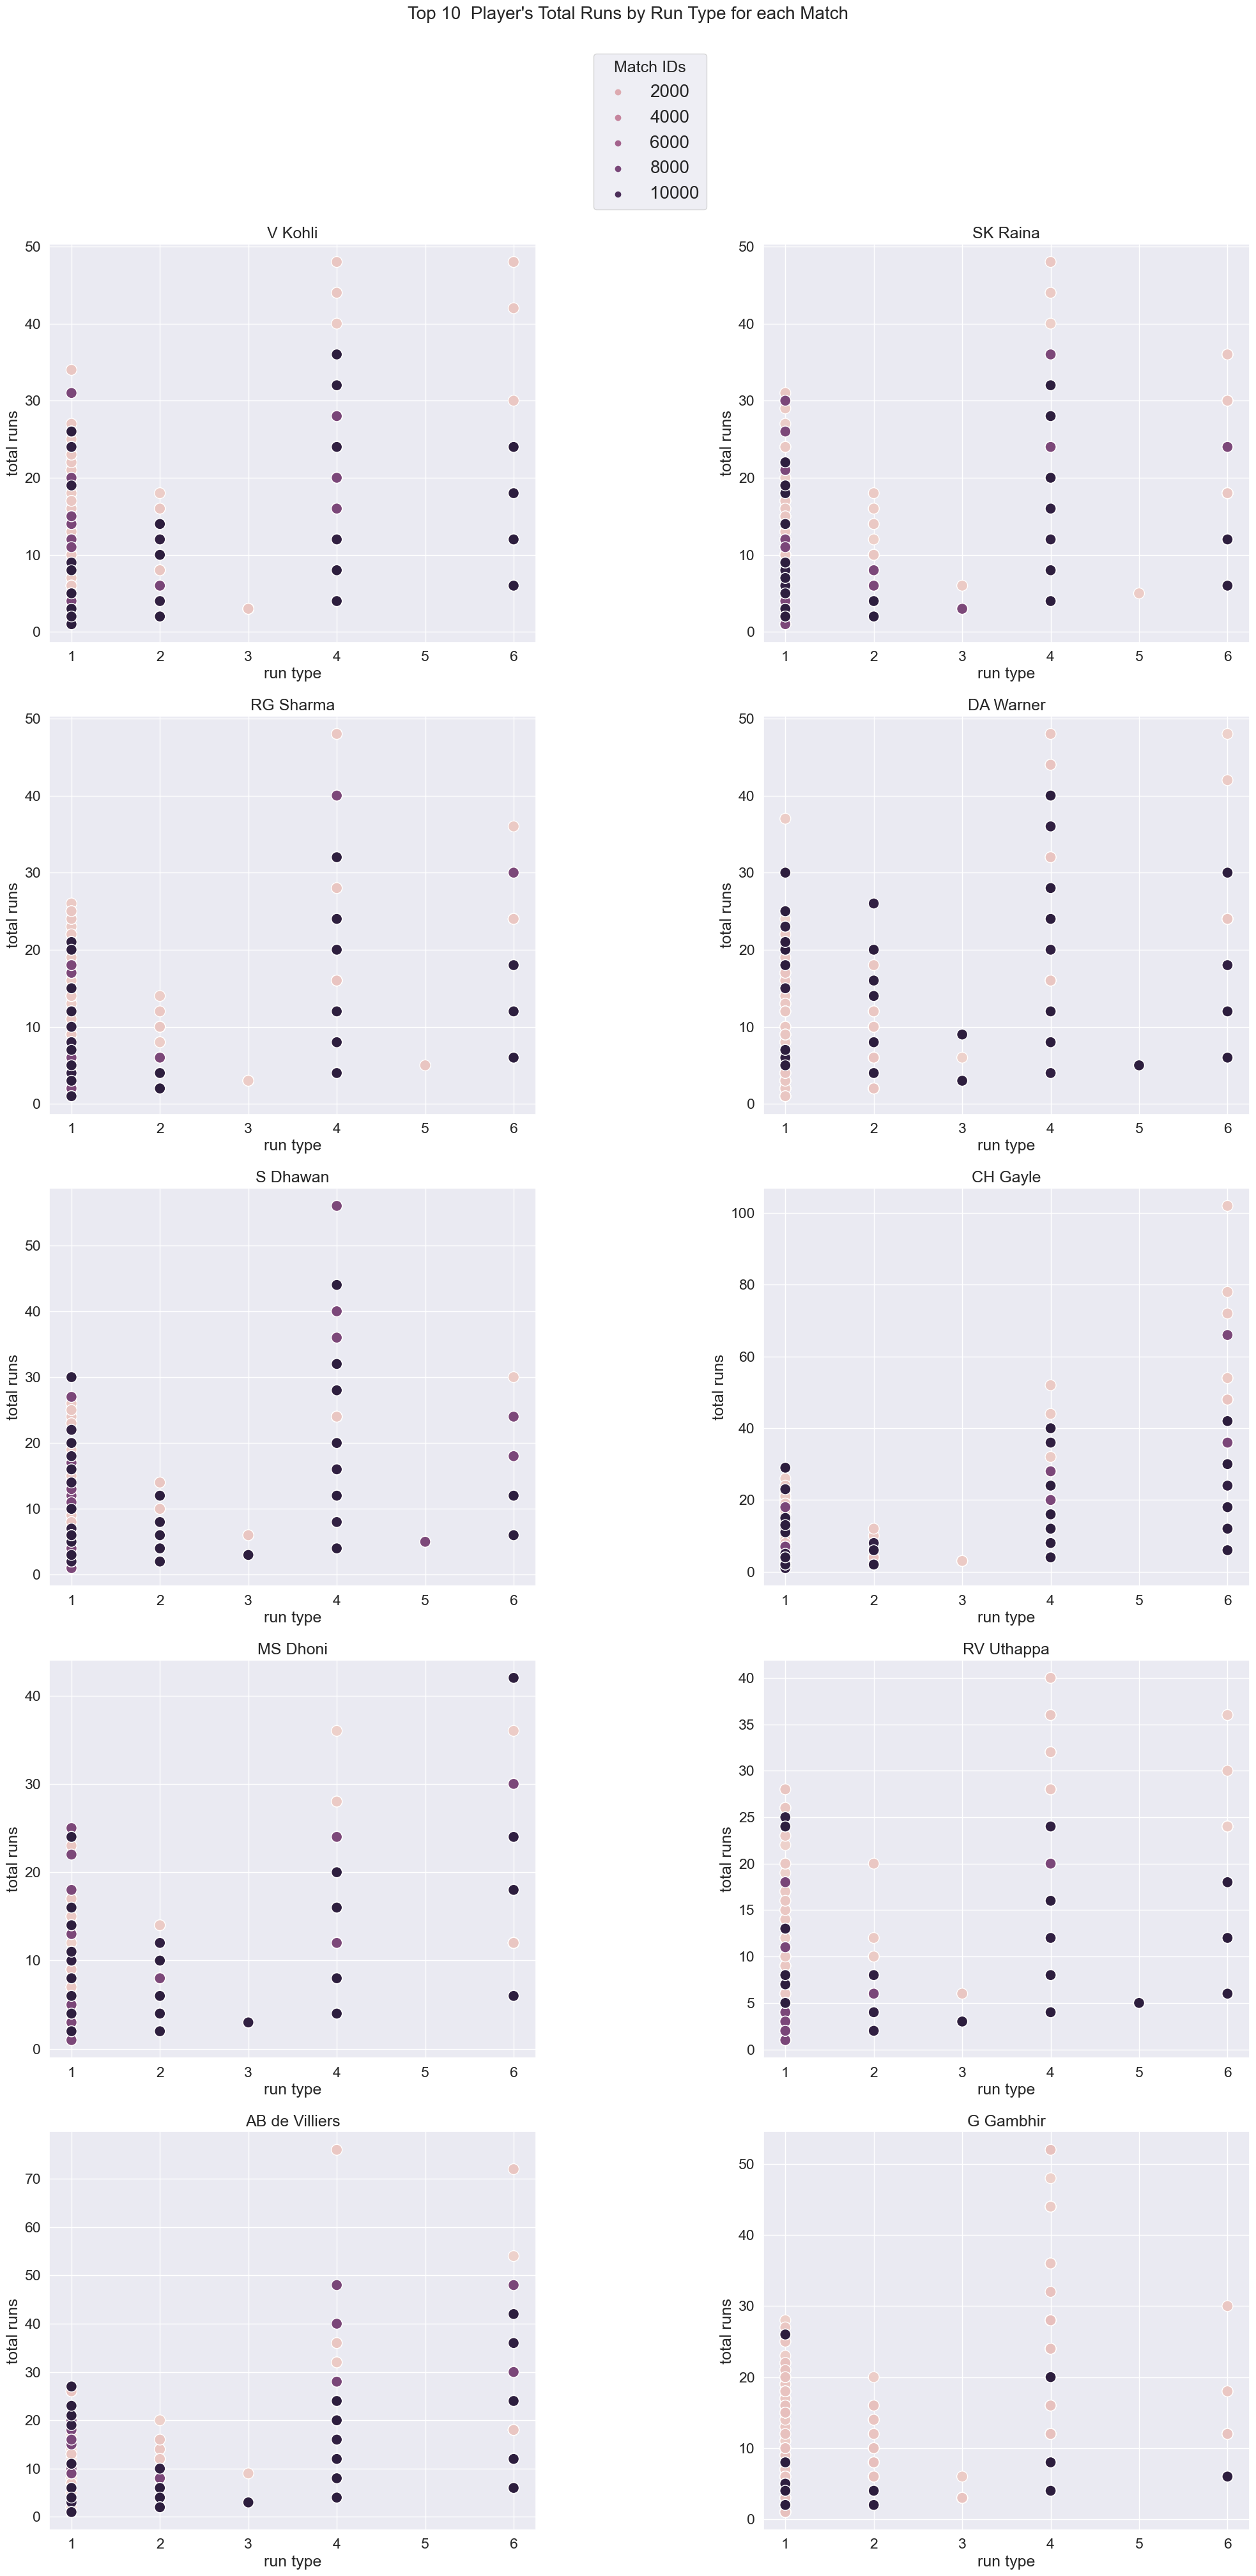

In [165]:
# Retrieve top 10 players.
top_10_players = batsman_run_type_match['batsman'].unique()[:10]

# Make subplots.
fig, axs = plt.subplots(5, 2, figsize=(20,40)) 
sns.set(font_scale=1.5)
fig.suptitle("Top 10  Player's Total Runs by Run Type for each Match", fontsize=20, y=1.01)

# Plot for each player
xp = 0
yp = 0
for player in top_10_players:
    temp = batsman_run_type_match[batsman_run_type_match['batsman'] == player]
    
    # Set legend (once only)
    legend = False
    if xp==yp==0:
        legend = True
        
    # Plot
    sns.scatterplot(x='batsman_run_type', y='runs', hue='match_id', data=temp, ax=axs[xp,yp], legend=legend, s=150)
    
    # Set the legend, title, and axis labels for each subplot.
    
    # Checks if it is the first subplot (i.e., the top left subplot), and if it is, it sets the legend for the plot.
    if legend: axs[xp,yp].legend(bbox_to_anchor=(1.1, 1.5), loc='upper left', title='Match IDs', fontsize=20)
    axs[xp,yp].set_title(player)
    axs[xp,yp].set_xlabel('run type')
    axs[xp,yp].set_ylabel('total runs')
    
    """ These lines are used to iterate through the subplots of the figure. 
            'yp' is used to keep track of the column of the subplot in the current row, 
            and 'xp' is used to keep track of the current row."""
    yp+=1
    """ Checks if yp >= 2, and if it is, sets yp to 0. This allows the subplots to wrap around to the next row after two columns have been filled."""
    yp = yp%2
    """ Checks if yp is equal to 0, which indicates that a new row has started, and increments the xp variable by 1 to move to the next row of subplots."""
    if yp==0: xp+=1
        
plt.tight_layout()

> Inferences:
> - Kohli, Raina, and Warner have shown consistency in scoring runs across all types of runs, including 1s, 2s, 3s, 4s, and 6s.
> - S Dhawan demonstrated consistent scoring of 4s throughout the series.
> - Gambhir's scoring of 4s and 6s reduced in the latter part of the series.

In [125]:
toss_won_match = matches.groupby(['toss_winner', 'winner']).aggregate({'winner': 'count'})
toss_won_match.columns = ['num_of_wins']
toss_won_match.reset_index(inplace=True)

# Total matches when toss won
toss_winner_mask = toss_won_match.groupby(['toss_winner']).num_of_wins.sum()
toss_won_match['total_matches_toss_won'] = toss_won_match['toss_winner'].map(toss_winner_mask)
toss_won_match

,toss_winner,winner,num_of_wins,total_matches_toss_won
0,Chennai Super Kings,Chennai Super Kings,57,89
1,Chennai Super Kings,Deccan Chargers,1,89
2,Chennai Super Kings,Delhi Daredevils,4,89
3,Chennai Super Kings,Kings XI Punjab,5,89
4,Chennai Super Kings,Kolkata Knight Riders,4,89
...,...,...,...,...
115,Sunrisers Hyderabad,Mumbai Indians,4,46
116,Sunrisers Hyderabad,Rajasthan Royals,2,46
117,Sunrisers Hyderabad,Rising Pune Supergiant,1,46
118,Sunrisers Hyderabad,Royal Challengers Bangalore,4,46


In [126]:
toss_des_won_match = matches.groupby(['toss_winner', 'toss_decision', 'winner']).aggregate({'winner': 'count'})
toss_des_won_match.columns = ['num_of_wins']
toss_des_won_match.reset_index(inplace=True)

# Total matches when toss won
toss_des_won_match_mask = toss_des_won_match.groupby(['toss_winner']).num_of_wins.sum()
toss_des_won_match['total_matches_toss_won'] = toss_des_won_match['toss_winner'].map(toss_des_won_match_mask)

# Computing total match won when toss won
temp = toss_des_won_match[toss_des_won_match.toss_winner == toss_des_won_match.winner]
temp_mask = temp.groupby('toss_winner').num_of_wins.sum()
toss_des_won_match['total_wins_toss_won'] = toss_des_won_match['toss_winner'].map(temp_mask)

toss_des_won_match

,toss_winner,toss_decision,winner,num_of_wins,total_matches_toss_won,total_wins_toss_won
0,Chennai Super Kings,bat,Chennai Super Kings,30,89,57
1,Chennai Super Kings,bat,Deccan Chargers,1,89,57
2,Chennai Super Kings,bat,Delhi Daredevils,3,89,57
3,Chennai Super Kings,bat,Kings XI Punjab,1,89,57
4,Chennai Super Kings,bat,Kolkata Knight Riders,4,89,57
...,...,...,...,...,...,...
182,Sunrisers Hyderabad,field,Kolkata Knight Riders,3,46,23
183,Sunrisers Hyderabad,field,Mumbai Indians,1,46,23
184,Sunrisers Hyderabad,field,Rising Pune Supergiant,1,46,23
185,Sunrisers Hyderabad,field,Royal Challengers Bangalore,2,46,23


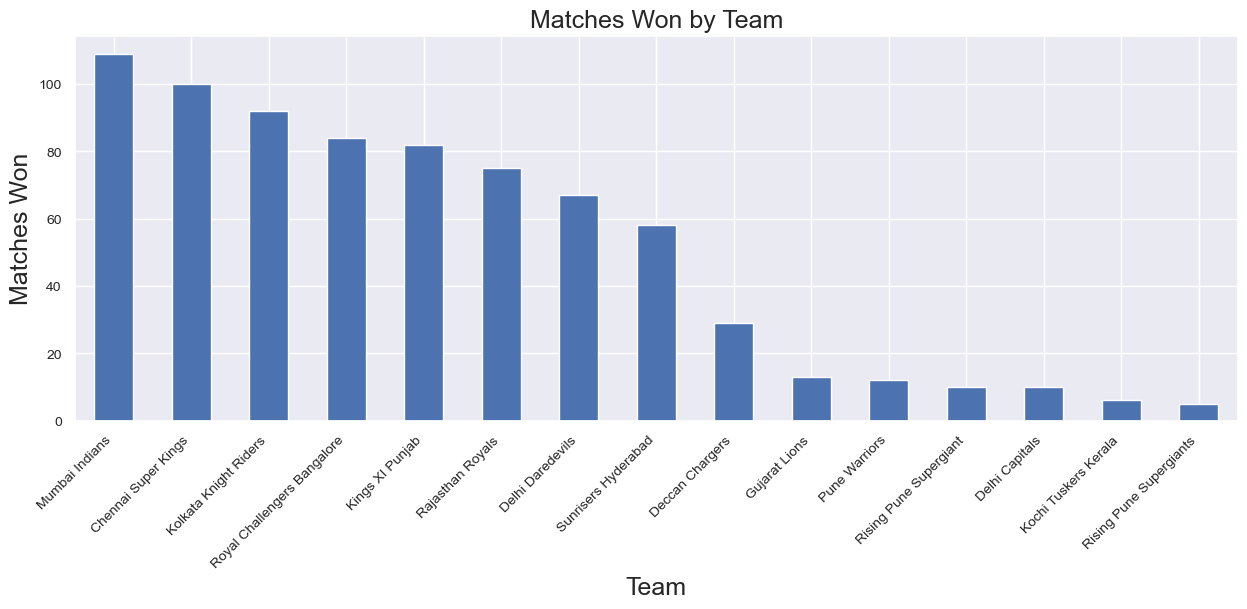

In [127]:
matches.winner.value_counts().plot(kind='bar', figsize=(15,5))
plt.xticks(rotation=45, ha='right')
plt.title('Matches Won by Team')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Team')
plt.ylabel('Matches Won')
plt.show()

- 'Mumbai Indians' has won the highest number of matches in the IPL.

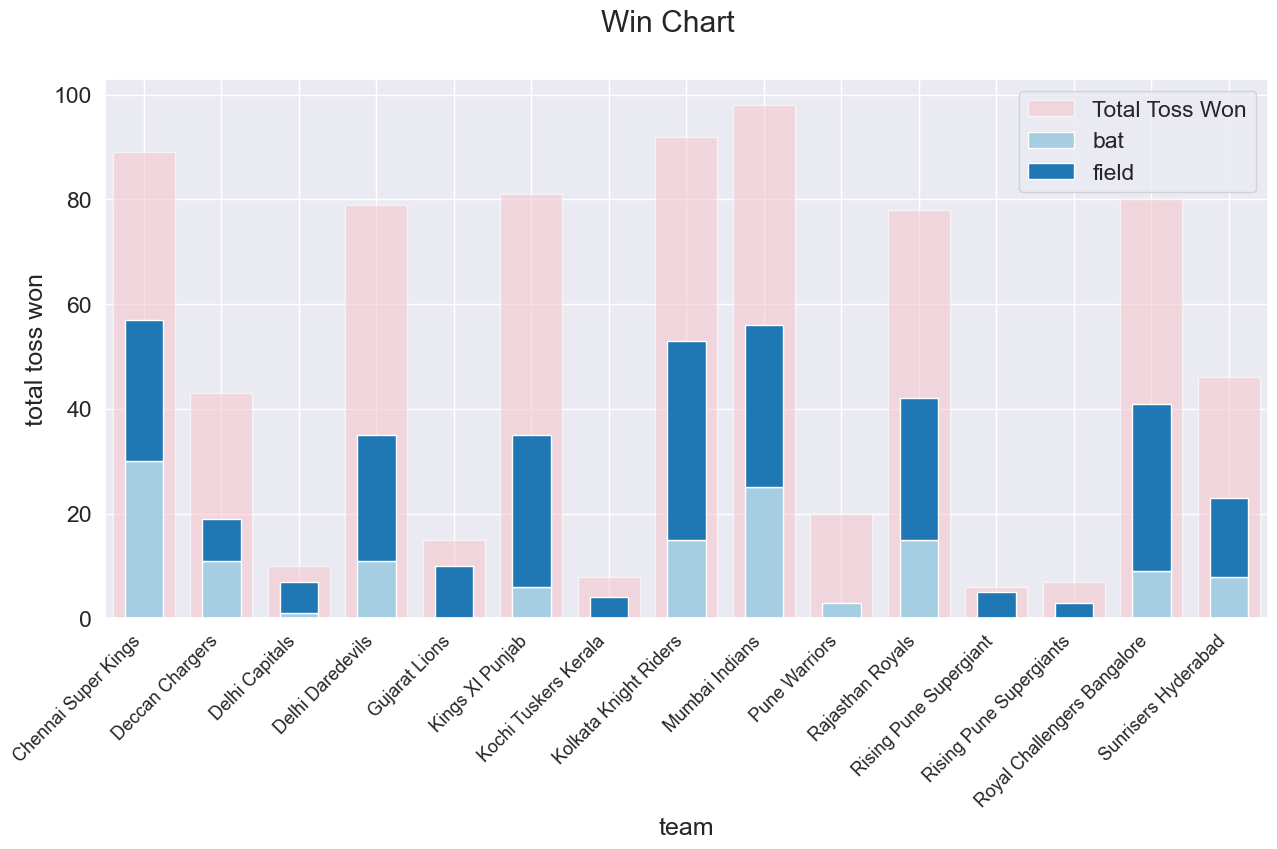

In [128]:
temp = toss_des_won_match[toss_des_won_match.toss_winner == toss_des_won_match.winner]

# create a pivot table to group data by toss_winner and toss_decision
pivot_df = temp.pivot(index='toss_winner', columns='toss_decision', values='num_of_wins')

cmap = cm.get_cmap('Paired')
colors = cmap(range(pivot_df.shape[1]))

fig, axs = plt.subplots(1,1,figsize=(15,7))
fig.suptitle('Win Chart')

sns.barplot(data=temp, x='toss_winner', y='total_matches_toss_won', ax=axs, label='Total Toss Won', alpha=0.6, color='pink')
pivot_df.plot(kind='bar', stacked=True, ax=axs, color=colors)
axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=13)

axs.set_xlabel('team')
axs.set_ylabel('total toss won')

plt.legend()
plt.show()

The plot shows number of total toss won by a team, and how many the games they won, which is futher divided by what they choose; feild or bat

- Most of the team has high chance to win, if they choose to field first
- 'Chennai Super Kings' had almost equal chance of winning choose whatever.

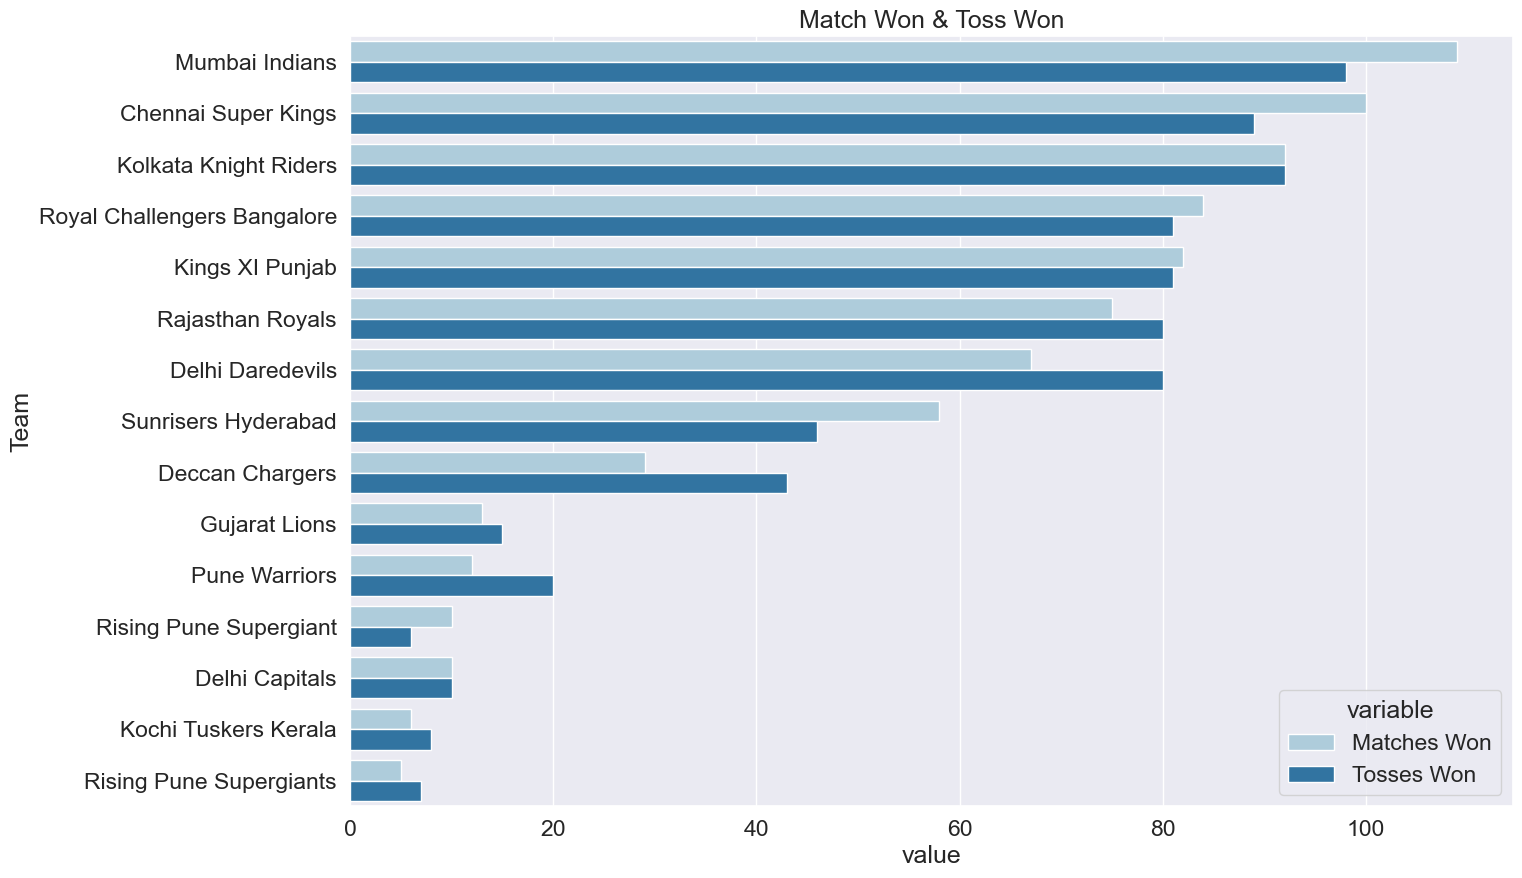

In [129]:
a = pd.DataFrame(matches.winner.value_counts())
b = pd.DataFrame(matches.toss_winner.value_counts())
a = a.merge(b, left_index=True, right_index=True)
a.reset_index(inplace=True)
a.columns = ['Team', 'Matches Won', 'Tosses Won']

# Grouped Bar plot
plt.figure(figsize=(15,10))
sns.barplot(x='value', y='Team', hue='variable', data=pd.melt(a, id_vars=['Team']), palette='Paired')
plt.title('Match Won & Toss Won')

plt.show()

- The team that wins the toss often has a higher chance of winning the match.
- Out of all the teams, only 'Deccan Chargers' and 'Pune Warriors' were not able to win matches even after winning the toss. Only about 60% of the games were able to be converted.

In [130]:
team_matches = matches.groupby(['winner', 'season']).id.count().reset_index()
team_matches.rename(columns={'id': 'matches_won'}, inplace=True)
team_matches.reset_index(drop=True, inplace=True)
team_matches

,winner,season,matches_won
0,Chennai Super Kings,2008,9
1,Chennai Super Kings,2009,8
2,Chennai Super Kings,2010,9
3,Chennai Super Kings,2011,11
4,Chennai Super Kings,2012,10
...,...,...,...
95,Sunrisers Hyderabad,2015,7
96,Sunrisers Hyderabad,2016,11
97,Sunrisers Hyderabad,2017,8
98,Sunrisers Hyderabad,2018,10


In [131]:
# Using Bokeh Package for interactive charts
import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral11
from bokeh.models import CategoricalColorMapper, Legend

In [132]:
# Color Palette
mypalette = Spectral11 + Spectral11
output_notebook()

# create a new plot with a title and axis labels
p = figure(
    title="Matches won by year",
    x_axis_label="Season",
    y_axis_label="Matches Won",
    width=1000,
)

legend_it = []

# Create a line plot for each Team
for i, team in enumerate(team_matches.winner.unique()):
    temp = team_matches[team_matches.winner == team]
    c = p.line(
        temp.season,
        temp.matches_won,
        line_width=2,
        color=mypalette[i],
    )
    legend_it.append((team, [c]))
    
# Show Legend, and place Legend Policy (to make legend interactive)
legend = Legend(items=legend_it, background_fill_alpha =0.1)
legend.click_policy = "mute"
p.add_layout(legend, "right")

# show the results
show(p)

Loading BokehJS ...

- Over the past years, the performance of 'Royal Challengers Bangalore' has shown a decline in terms of winning matches.
- 'Mumbai Indians' have exhibited high fluctuations in their performance, with varying numbers of winning matches across different years.
- 'Chennai Super Kings' have demonstrated a consistent level of performance over the years, winning at least 10-12 matches every time.

*Note: The interactive legend allows you to explore the data by clicking on different labels.*

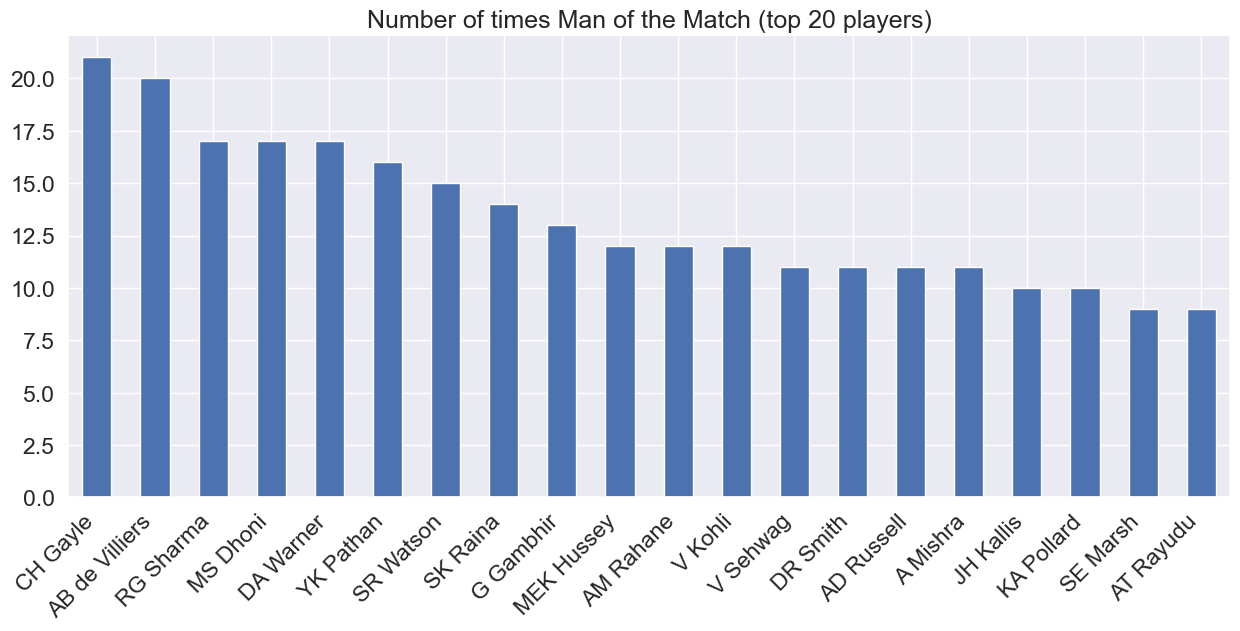

In [133]:
matches.player_of_match.value_counts()[:20].plot(kind='bar', figsize=(15,6), title='Number of times Man of the Match (top 20 players)')
plt.xticks(rotation=45, ha='right')
plt.show()

Over the past decade, 'CH Gayle' and 'AB de Villiers' were awarded the title of 'Man of the Match' 21 and 20 times, respectively.

In [134]:
batsman_runs_years = deliveries_matches.groupby(['batsman', 'season']).aggregate({'total_runs': 'sum'}).reset_index()
top10_batsman = runs_deliveries['total_runs'].head(10).index.values
Top_batsman_runs_years = batsman_runs_years[batsman_runs_years.batsman.isin(top10_batsman)]
Top_batsman_runs_years.head()

,batsman,season,total_runs
78,AB de Villiers,2008,99
79,AB de Villiers,2009,472
80,AB de Villiers,2010,117
81,AB de Villiers,2011,328
82,AB de Villiers,2012,331


In [135]:
# Color Palette
mypalette = Spectral11 + Spectral11
output_notebook()

# create a new plot with a title and axis labels
p = figure(
    title="Total Runs by year",
    x_axis_label="Season",
    y_axis_label="Total Runs",
    width=1000,
)

legend_it = []

# Create a line plot for each Team
for i, batsman in enumerate(top10_batsman):
    temp = Top_batsman_runs_years[Top_batsman_runs_years.batsman == batsman]
    c = p.line(
        temp.season,
        temp.total_runs,
        line_width=2,
        color=mypalette[i],
    )
    legend_it.append((batsman, [c]))
    
# Show Legend, and place Legend Policy (to make legend interactive)
legend = Legend(items=legend_it, background_fill_alpha=0.1)
legend.click_policy = "mute"
p.add_layout(legend, "right")

# show the results
show(p)

Loading BokehJS ...

- The analysis reveals that 'MS Dhoni' exhibits a higher degree of consistency in performance as compared to 'V Kohli', who shows frequent fluctuations in performance levels.
- V Kohli' recorded a remarkable feat of scoring approximately 1000 runs in 2016 alone.
- 'DA Warner' displayed an incredible exponential improvement in performance over the years.
- In 2018, 'G Gambhir' experienced a significant decline in his run-scoring ability, which can be attributed to his relatively low number of deliveries faced that year.
    - Notably, 2018 marked the year when 'G Gambhir' was acquired by 'Delhi Daredevils' and played for the first time with the team.

In [136]:
bowler_dismissal_years = deliveries_matches.groupby(['bowler', 'season']).aggregate({'dismissal_kind': 'count'}).reset_index()
bowler_dismissal_years.rename(columns={'dismissal_kind':'total_dismissals'}, inplace=True)
top10_bowlers = outs_deliveries['total_wickets'].head(10).index.values
Top_bowler_dismissal_years = bowler_dismissal_years[bowler_dismissal_years.bowler.isin(top10_bowlers)]
Top_bowler_dismissal_years.head()

,bowler,season,total_dismissals
13,A Mishra,2008,11
14,A Mishra,2009,14
15,A Mishra,2010,20
16,A Mishra,2011,19
17,A Mishra,2012,13


In [137]:
# Color Palette
mypalette = Spectral11 + Spectral11
output_notebook()

# create a new plot with a title and axis labels
p = figure(
    title="Total Dismissals by year",
    x_axis_label="Season",
    y_axis_label="Total Dismissals",
    width=1000,
)

legend_it = []

# Create a line plot for each Team
for i, bowler in enumerate(top10_bowlers):
    temp = Top_bowler_dismissal_years[Top_bowler_dismissal_years.bowler == bowler]
    c = p.line(
        temp.season,
        temp.total_dismissals,
        line_width=2,
        color=mypalette[i],
    )
    legend_it.append((bowler, [c]))
    
# Show Legend, and place Legend Policy (to make legend interactive)
legend = Legend(items=legend_it, background_fill_alpha =0.1)
legend.click_policy = "mute"
p.add_layout(legend, "right")

# show the results
show(p)

Loading BokehJS ...

- In the 2015 IPL tournament, 'DJ Bravo' demonstrated exceptional performance; however, his performance has been declining drastically since then.
- 'B Kumar' and 'R Ashwin' have exhibited a consistent improvement in performance throughout the years.
- 'R Vinay Kumar' has been in a state of decline since 2015.

# CONCLUSION

- In this analysis, we have observed some of the most successful teams, including 'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', and others. 
- We have also identified players with exceptional performance throughout their IPL journey, such as 'Raina', 'Virat Kohli', 'RG Sharma', 'Warner', and more. 
- Additionally, notable bowlers such as 'Malinga', 'DJ Bravo', and 'Amit Mishra' who had demonstrated consistent performance in recent years.
- Talking about Fielders, wicket keepers have the highest number of dismissals among fielders. Include Players like 'MS Dhoni', 'KD Karthik', 'Uthappa', etc.

**<font color='green'>These teams and players are ideal candidates for endorsements and have the potential to generate significant monetary benefits for businesses.</font>**